# Chapter 3 - Linear Regression

In [1]:
# Import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
# Use Pandas to read the advertising csv file from the data folder
ad_df = pd.read_csv('./Textbook_Data/Advertising.csv', usecols=[1,2,3,4])
ad_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [3]:
# Use Pandas to read the credit csv file from the data folder
credit_df = pd.read_csv('./Textbook_Data/Credit.csv', usecols=list(range(1,12)))

# Define a new columne, if the individual is a student assign a value '1', otherwise '0'
credit_df['Student2'] = credit_df.Student.map({'No':0, 'Yes':1})
credit_df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Student2
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0


In [4]:
# Use Pandas to read the auto csv file from the data folder and drop the rows with null value
auto_df = pd.read_csv('./Textbook_Data/Auto.csv', na_values='?').dropna()
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


# Simple Linear Regression
- Using StatsModels
- Using Scikit-Learn

C:\Users\lokma\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


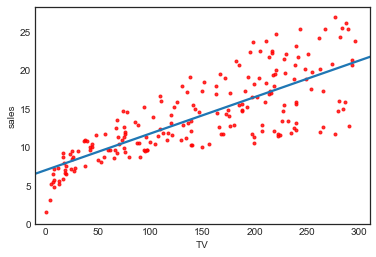

In [5]:
# Using the regplot() function to plot the regression line and data for TV and Sales variables
sns.regplot(ad_df.TV, ad_df.sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10, 310)
plt.ylim(ymin=0);

In [6]:
# Regression coefficients (Ordinary Least Squares)
regr = skl_lm.LinearRegression()

X = scale(ad_df.TV, with_mean=True, with_std=False).reshape(-1,1)
y = ad_df.sales

regr.fit(X, y)
print(regr.intercept_)
print(regr.coef_)

14.0225
[0.04753664]


In [7]:
# Create grid coordinates for plotting
B0 = np.linspace(regr.intercept_-2, regr.intercept_+2, 50)
B1 = np.linspace(regr.coef_-0.02, regr.coef_+0.02, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size, B1.size))

# Calculate z-values (RSS) based on grid of coefficients
for (i,j), v in np.ndenumerate(Z):
    Z[i,j] = ((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()/1000
    
# Minimized RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)/1000
min_rss

2.1025305831313514

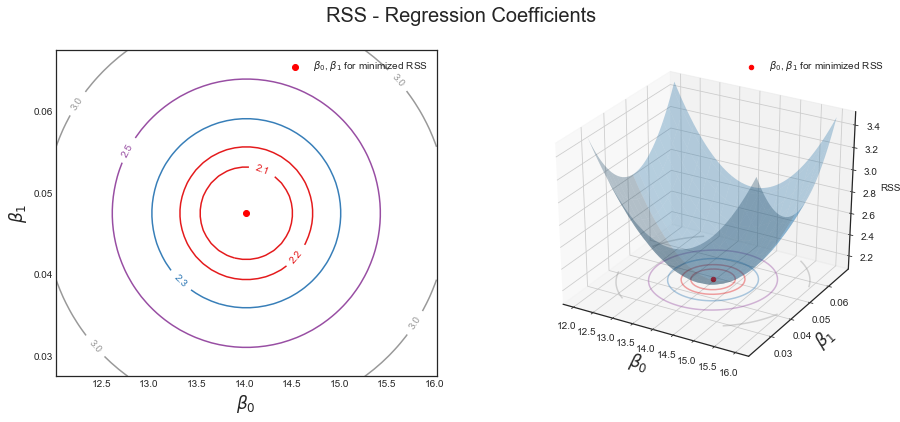

In [16]:
# Plotting the RSS vs Regression coefficients
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Regression Coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Setting up the left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(regr.intercept_, regr.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# Setting up the right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
           alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(), Z.max())
ax2.set_ylim(0.02, 0.07)

# Setting common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.set_yticks([0.03, 0.04, 0.05, 0.06])
    ax.legend()
    

# Linear Regression Model
- Using StatsModels
- Using Scikit-Learn

In [8]:
# Using StatsModels for linear regression
# Creating confidence interval for the coefficients
# Model: Sales = B0 + B1*TV + e
est = smf.ols('sales ~ TV', ad_df).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [9]:
# RSS with regression coefficents
((ad_df.sales - (est.params[0] + est.params[1]*ad_df.TV))**2).sum()/1000

2.1025305831313514

In [10]:
# Using Scikit-Learn for Linear Regression
regr = skl_lm.LinearRegression()

# Creating the independent varaible "TV" and dependent varaible "Sales"
X = ad_df.TV.values.reshape(-1, 1)
y = ad_df.sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

7.032593549127693
[0.04753664]


In [11]:
# Using the linear regression model to predict sales
Sales_pred = regr.predict(X)
# print(Sales_pred)

# Return the r^2 of the model
r2_score(y, Sales_pred)

0.611875050850071

In [ ]:
# Using StatsModels for Multiple Linear Regression

In [12]:
# Using StatsModels to model Sales by Radio
est = smf.ols('sales ~ radio', ad_df).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [13]:
# Using StatsModels to model Sales by Newspaper
est = smf.ols('sales ~ newspaper', ad_df).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


In [14]:
# According to the previous models, we learned that TV, Radio, and Newspaper are statistically signicant in each linear model
# We can also confirm with the correlation matrix
ad_df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [15]:
# Using StatsModels to create multiple linear regression model
est = smf.ols('sales ~ TV + radio + newspaper', ad_df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 30 Nov 2019   Prob (F-statistic):           1.58e-96
Time:                        22:16:21   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# Using Scikit-Learn for multiple lienar regression
regr = skl_lm.LinearRegression()

# Creating the independent variables "Radio" and "TV" and dependent varaible "Sales"
X = ad_df[['radio', 'TV']].as_matrix()
y = ad_df.sales

regr.fit(X, y)
print(regr.coef_)
print(regr.intercept_)

[0.18799423 0.04575482]
2.9210999124051398


C:\Users\lokma\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [17]:
# We can find the min and max values of Radio and TV
# Use the values to set up the grid for plotting
ad_df[['radio', 'TV']].describe()

,radio,TV
count,200.000000,200.000000
mean,23.264000,147.042500
std,14.846809,85.854236
min,0.000000,0.700000
25%,9.975000,74.375000
50%,22.900000,149.750000
75%,36.525000,218.825000
max,49.600000,296.400000


In [18]:
# Create a coordinate grid
Radio = np.arange(0, 50)
TV = np.arange(0, 300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = (regr.intercept_ + B1[i,j]*regr.coef_[0] + B2[i,j]*regr.coef_[1])
    

C:\Users\lokma\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:671: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


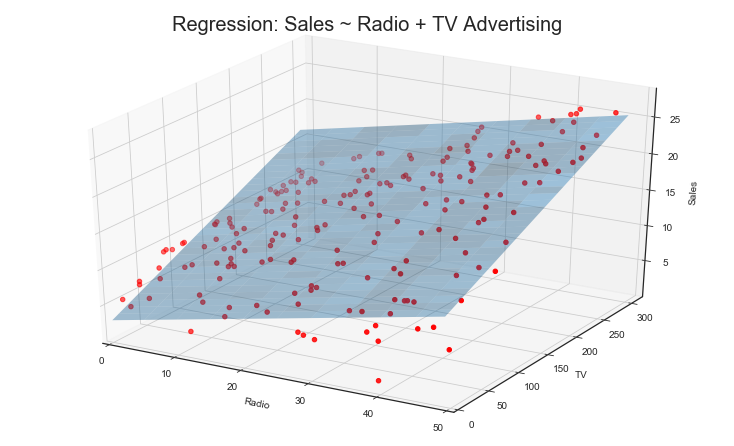

In [19]:
# Create plot for the data and surface 
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Sales ~ Radio + TV Advertising', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(ad_df.radio, ad_df.TV, ad_df.sales, c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Sales');

# Other Considerations in the Regression Model
- Qualitative Predictors
- Extensions of the Linear Model
- Potential Problems

## Qualitative Predictors

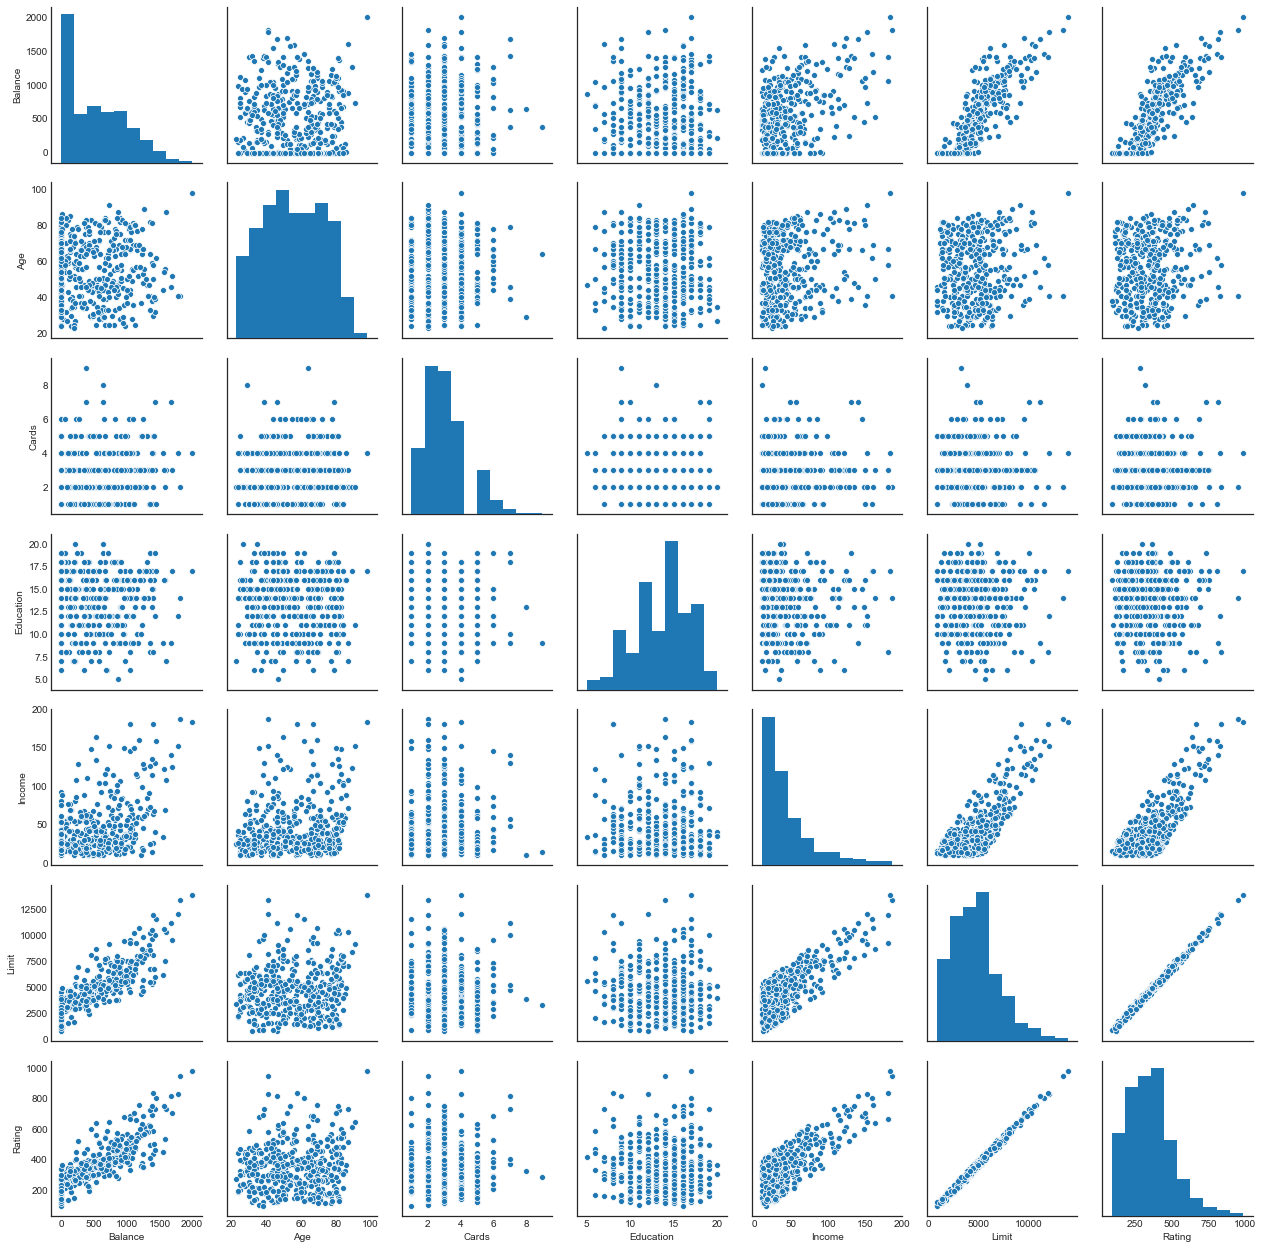

In [20]:
# In the previous examples, we learned how to construct the regression model with quantitative data.
# In reality, it is not necessarily the case and often some varaibles are qualitative.
# Using the Credit data set and create pairs plot
sns.pairplot(credit_df[['Balance', 'Age', 'Cards', 'Education', 'Income', 'Limit', 'Rating']]);

In [21]:
# In this data set, variables 'Gender' is a catagorical data (not continuos), which take value of 'male' or 'female'.
# We can still use it as our independent variable in the model
est = smf.ols('Balance ~ Gender', credit_df).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,529.5362,31.988,16.554,0.000,466.649,592.423
Gender[T.Male],-19.7331,46.051,-0.429,0.669,-110.267,70.801


In [22]:
# Sometime we may need to deal with qualitative variables with more than two levels (male/female)
# For instance, 'Ethnicity' in the data set contains more than two catagories
credit_df.Ethnicity.unique()

array(['Caucasian', 'Asian', 'African American'], dtype=object)

In [23]:
# In this case, we can still run the regression model with the variable 'Ethnicity' by creating additional dummy varaibles
est = smf.ols('Balance ~ Ethnicity', credit_df).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,531.0000,46.319,11.464,0.000,439.939,622.061
Ethnicity[T.Asian],-18.6863,65.021,-0.287,0.774,-146.515,109.142
Ethnicity[T.Caucasian],-12.5025,56.681,-0.221,0.826,-123.935,98.930


## Extensions of the Linear Model
- Removing the Additive Assumption (Interaction Effect)
- Non-Linear Relationships

In [24]:
# In the previous advertising model, we use TV and Radio to model Sales
# Sales = B0 + B1*TV + B2*Radio + e
# However, in the reality, spending money on radio advertising may increases the effectiveness of TV advertising
# Sales = B0 + B1*TV + B2*Radio + B3*(TV*Radio) + e
est = smf.ols('sales ~ TV + radio + TV*radio', ad_df).fit()
est.summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV:radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


In [25]:
# The interaction effect is not limited to quantitative varaibles.
# In the credit data set, we can also model Balance using quantitative varaible 'Income', qualitative varaible 'Student2', and the interaction of the two

# Model with no interaction
est1 = smf.ols('Balance ~ Income + Student2', credit_df).fit()
regr1 = est1.params

# Model with interaction term
est2 = smf.ols('Balance ~ Income + Student2 + Income*Student2', credit_df).fit()
regr2 = est2.params

# Compare the output of the two models
print('Regression 1 - Without Interaction Term')
print(regr1)
print('\nRegression 2 - With Interaction Term')
print(regr2)

Regression 1 - Without Interaction Term
Intercept    211.142964
Income         5.984336
Student2     382.670539
dtype: float64

Regression 2 - With Interaction Term
Intercept          200.623153
Income               6.218169
Student2           476.675843
Income:Student2     -1.999151
dtype: float64


C:\Users\lokma\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')
C:\Users\lokma\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


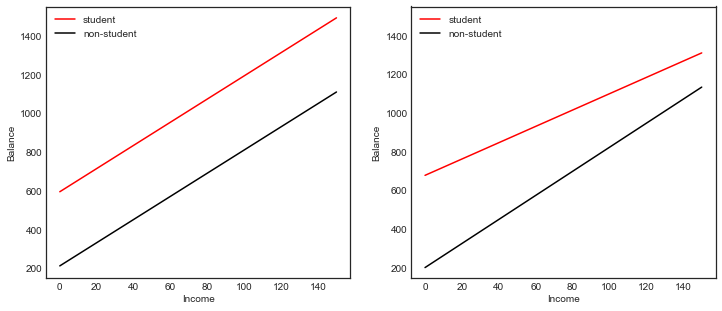

In [26]:
# Compare the two models with visualization

# Income (x-axis)
income = np.linspace(0,150)

# Balance without interation term (y-axis)
student1 = np.linspace(regr1['Intercept']+regr1['Student2'],
                      regr1['Intercept']+regr1['Student2']+150*regr1['Income'])
non_student1 = np.linspace(regr1['Intercept'], regr1['Intercept']+150*regr1['Income'])

# Balance with interation term (y-axis)
student2 = np.linspace(regr2['Intercept']+regr2['Student2'],
                       regr2['Intercept']+regr2['Student2']+
                       150*(regr2['Income']+regr2['Income:Student2']))
non_student2 =  np.linspace(regr2['Intercept'], regr2['Intercept']+150*regr2['Income'])

# Create plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(income, student1, 'r', income, non_student1, 'k')
ax2.plot(income, student2, 'r', income, non_student2, 'k')

for ax in fig.axes:
    ax.legend(['student', 'non-student'], loc=2)
    ax.set_xlabel('Income')
    ax.set_ylabel('Balance')
    ax.set_ylim(ymax=1550)


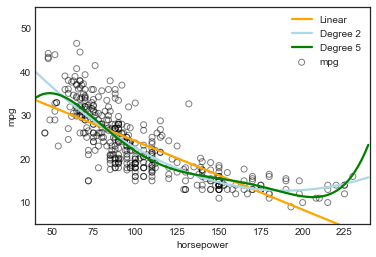

In [27]:
# Linear model assumes linear relationship between the response and predictors.
# In some cases, the true relationship between the response and the predictors may be non-linear.

# With Seaborn's regplot() we can easily plot higher order polynomials.
plt.scatter(auto_df.horsepower, auto_df.mpg, facecolors='None', edgecolors='k', alpha=.5) 
sns.regplot(auto_df.horsepower, auto_df.mpg, ci=None, label='Linear', scatter=False, color='orange')
sns.regplot(auto_df.horsepower, auto_df.mpg, ci=None, label='Degree 2', order=2, scatter=False, color='lightblue')
sns.regplot(auto_df.horsepower, auto_df.mpg, ci=None, label='Degree 5', order=5, scatter=False, color='g')
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);

In [28]:
# In the auto data set, we may believe mpg has a linear relationship with hoursepower
# Basic Model: mpg = B0 + B1*hoursepower + e
# However, according to the data, the true model may look more like a polynomial
# True Model: mpg = B0 + B1*hoursepower + B2*hoursepower^2 + e

# To include a squared term in the model, we can first create a new column for the squared term
auto_df['horsepower2'] = auto_df.horsepower**2
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,16900.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,27225.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,22500.0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,22500.0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,19600.0


In [29]:
# Using StatsModels to build the linear regression model with the squared term
est = smf.ols('mpg ~ horsepower + horsepower2', auto_df).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,56.9001,1.800,31.604,0.000,53.360,60.440
horsepower,-0.4662,0.031,-14.978,0.000,-0.527,-0.405
horsepower2,0.0012,0.000,10.080,0.000,0.001,0.001


In [30]:
# Using Scikit-Learn to build the same model
regr = skl_lm.LinearRegression()

# Create the independents varaibles X and dependent variable y
X = auto_df.horsepower.values.reshape(-1, 1)
y = auto_df.mpg

# Model without the squared term
regr.fit(X, y)

# Calculate the residual of the model
auto_df['pred1'] = regr.predict(X)
auto_df['resid1'] = auto_df.mpg - auto_df.pred1

# Model with the squared term (Quadratic fit)
X2 = auto_df[['horsepower', 'horsepower2']].as_matrix()
regr.fit(X2, y)

# Calculate the residual of the model
auto_df['pred2'] = regr.predict(X2)
auto_df['resid2'] = auto_df.mpg - auto_df.pred2

C:\Users\lokma\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


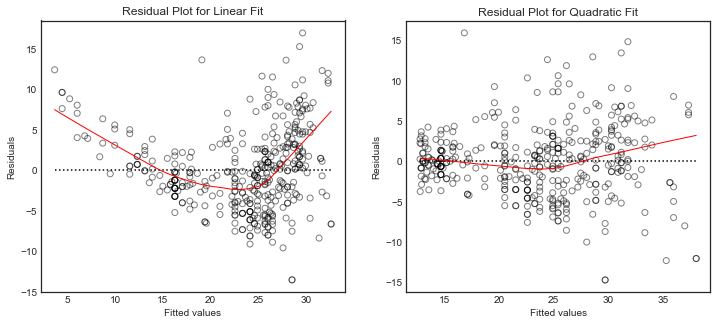

In [31]:
# Compare the residual plots between the two models visually

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
sns.regplot(auto_df.pred1, auto_df.resid1, lowess=True, 
            ax=ax1, line_kws={'color':'r', 'lw':1},
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax1.hlines(0,xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dotted')
ax1.set_title('Residual Plot for Linear Fit')

# Right plot
sns.regplot(auto_df.pred2, auto_df.resid2, lowess=True,
            line_kws={'color':'r', 'lw':1}, ax=ax2,
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax2.hlines(0,xmin=ax2.xaxis.get_data_interval()[0],
           xmax=ax2.xaxis.get_data_interval()[1], linestyles='dotted')
ax2.set_title('Residual Plot for Quadratic Fit')

for ax in fig.axes:
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')

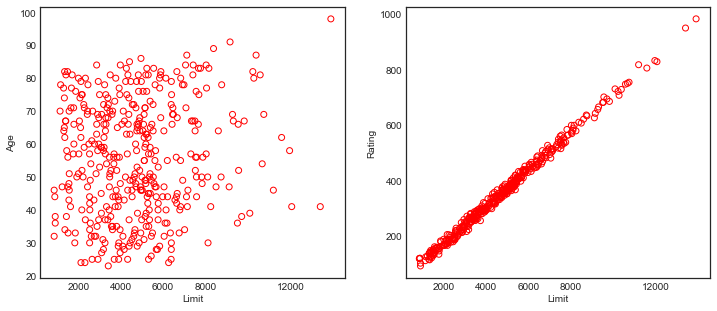

In [32]:
# Collinearity refers to the situation in which two or more predictor varaibles are closely relatedto one another.

# Using the credit data set, we can find that limit and age have no obvious relationship, but limit and rating are very highly correlated with each other.
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
ax1.scatter(credit_df.Limit, credit_df.Age, facecolor='None', edgecolor='r')
ax1.set_ylabel('Age')

# Right plot
ax2.scatter(credit_df.Limit, credit_df.Rating, facecolor='None', edgecolor='r')
ax2.set_ylabel('Rating')

for ax in fig.axes:
    ax.set_xlabel('Limit')
    ax.set_xticks([2000,4000,6000,8000,12000])

In [33]:
# The presence of collinearity can pose problems in the regression context.
# Because it can be difficult to separate out the individual effects of collinear varaibles on the response.

y = credit_df.Balance

# Regression for left plot
X = credit_df[['Age', 'Limit']].as_matrix()
regr1 = skl_lm.LinearRegression()
regr1.fit(scale(X.astype('float'), with_std=False), y)
print('Age/Limit\n',regr1.intercept_)
print(regr1.coef_)

# Regression for right plot
X2 = credit_df[['Rating', 'Limit']].as_matrix()
regr2 = skl_lm.LinearRegression()
regr2.fit(scale(X2.astype('float'), with_std=False), y)
print('\nRating/Limit\n',regr2.intercept_)
print(regr2.coef_)

Age/Limit
 520.0150000000001
[-2.29148553  0.17336497]

Rating/Limit
 520.015
[2.20167217 0.02451438]


C:\Users\lokma\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Users\lokma\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [34]:
# Create grid coordinates for plotting
B_Age = np.linspace(regr1.coef_[0]-3, regr1.coef_[0]+3, 100)
B_Limit = np.linspace(regr1.coef_[1]-0.02, regr1.coef_[1]+0.02, 100)

B_Rating = np.linspace(regr2.coef_[0]-3, regr2.coef_[0]+3, 100)
B_Limit2 = np.linspace(regr2.coef_[1]-0.2, regr2.coef_[1]+0.2, 100)

X1, Y1 = np.meshgrid(B_Limit, B_Age, indexing='xy')
X2, Y2 = np.meshgrid(B_Limit2, B_Rating, indexing='xy')
Z1 = np.zeros((B_Age.size,B_Limit.size))
Z2 = np.zeros((B_Rating.size,B_Limit2.size))

Limit_scaled = scale(credit_df.Limit.astype('float'), with_std=False)
Age_scaled = scale(credit_df.Age.astype('float'), with_std=False)
Rating_scaled = scale(credit_df.Rating.astype('float'), with_std=False)

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z1):
    Z1[i,j] =((y - (regr1.intercept_ + X1[i,j]*Limit_scaled +
                    Y1[i,j]*Age_scaled))**2).sum()/1000000
    
for (i,j),v in np.ndenumerate(Z2):
    Z2[i,j] =((y - (regr2.intercept_ + X2[i,j]*Limit_scaled +
                    Y2[i,j]*Rating_scaled))**2).sum()/1000000

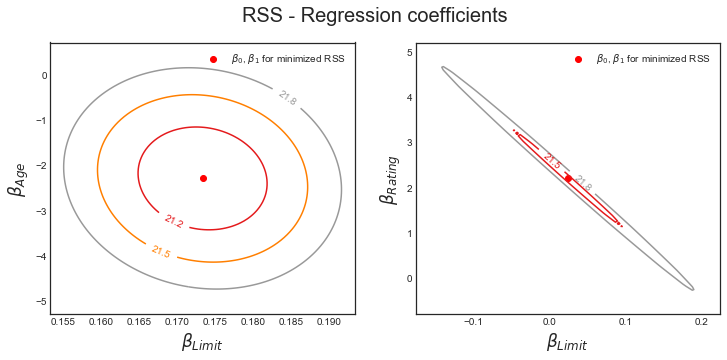

In [35]:
fig = plt.figure(figsize=(12,5))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
    
# Left plot
CS = ax1.contour(X1, Y1, Z1, cmap=plt.cm.Set1, levels=[21.25, 21.5, 21.8])
ax1.scatter(regr1.coef_[1], regr1.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax1.set_ylabel(r'$\beta_{Age}$', fontsize=17)

# Right plot
CS = ax2.contour(X2, Y2, Z2, cmap=plt.cm.Set1, levels=[21.5, 21.8])
ax2.scatter(regr2.coef_[1], regr2.coef_[0], c='r', label=min_RSS)
ax2.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax2.set_ylabel(r'$\beta_{Rating}$', fontsize=17)
ax2.set_xticks([-0.1, 0, 0.1, 0.2])

for ax in fig.axes:
    ax.set_xlabel(r'$\beta_{Limit}$', fontsize=17)
    ax.legend()

In [36]:
# Variance Inflation Factor (VIF)
est_Age = smf.ols('Age ~ Rating + Limit', credit_df).fit()
est_Rating = smf.ols('Rating ~ Age + Limit', credit_df).fit()
est_Limit = smf.ols('Limit ~ Age + Rating', credit_df).fit()

print(1/(1-est_Age.rsquared))
print(1/(1-est_Rating.rsquared))
print(1/(1-est_Limit.rsquared))

1.0113846860681328
160.66830095856935
160.59287978597942
